# **Level Up: Exploring the World of Video Game Sales**
***
Author: Kellie Leopold    
Date: February 18th, 2025  

### *Purpose*
Conduct an exploratory data analysis (EDA) project on video game sales data. Use GitHub for version control, Git for collaboration, and Jupyter Notebook along with pandas, Seaborn, and other popular data analytics tools to analyze trends and insights. 

### *Introduction*
Welcome to the next level of data analysis—where I dive in like a 'sweat,' even if my gaming skills are pure button-masher chaos.

Gaming is a favorite global pastime, rich with data and endless insights to uncover. In this exploration, we’re diving into the world of console game sales, where the numbers are as varied as the genres of games themselves. From Mario’s iconic leaps to the epic battles in *The Legend of Zelda* (shout-out to my favorite installment—*Ocarina of Time*!), the gaming industry has seen its fair share of highs and lows.

Behind every record-breaking title, there’s a story waiting to be told through the data. How do game sales stack up across consoles and regions? Which titles kept players hooked, and what developers are stealing the spotlight?

Grab your controller (or a cup of coffee) and let’s uncover the truth behind the numbers.

***

### **Imports**
* pandas
* pathlib
* Seaborn
* matplotlib.pyplot

In [414]:
import pandas as pd # Handles data manipulation and analysis
import pathlib # Manipulates file and directory paths
import seaborn as sns # Simplifies complex visualizations
import matplotlib.pyplot as plt # Basic tools for plotting and visualizing data
import numpy as np # Used for arrays

### **1. Load the Data**
***
* Load the CSV dataset downloaded from Kaggle.
* Inspect the first few lines of data to ensure they loaded correctly.

In [415]:
# Load dataset into pandas DataFrame
df = pd.read_csv('vgchartz-2024.csv')

# Display basic information about the dataset
df.columns

# Display the first few rows of the DataFrame
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### **2. Data Inspection**
***
* Get rid of the decimal point in the Year column.
* Display the first 10 rows of the DataFrame.
* Check the shape.
* Display the data types of each column.

In [416]:
# Convert Year column to int64 to get rid of the decimal point
df['Year'] = df['Year'].apply(lambda x: int(x) if pd.notnull(x) else x) # Convert valid non-null entries to integers
df['Year'] = df['Year'].astype('Int64')

# Display the DataFrame
display(df.head(10))

# Display the data shape
print("Data Shape:", df.shape)

# Display the data type
print("Data Types:\n", df.dtypes)

# Inspect the data types of the columns
df.info()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Data Shape: (16598, 10)
Data Types:
 Name             object
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  Int64  
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), object(4)
memory usage: 1.3+ MB


### **3. Descriptive Statistics**
***
Displays summary statistics for each column.

In [417]:
# Check the summary statistics for numerical columns
print(df.describe())

# Show the number of unique values in each column
print(df.nunique())  

              Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count      16327.0  16598.000000  16598.000000  16598.000000  16598.000000   
mean   2006.406443      0.264667      0.146652      0.077782      0.048063   
std       5.828981      0.816683      0.505351      0.309291      0.188588   
min         1980.0      0.000000      0.000000      0.000000      0.000000   
25%         2003.0      0.000000      0.000000      0.000000      0.000000   
50%         2007.0      0.080000      0.020000      0.000000      0.010000   
75%         2010.0      0.240000      0.110000      0.040000      0.040000   
max         2020.0     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  
Name            11493
Platform           31
Year               39
Genre              12
Publisher  

### **4. Data Distribution for Numerical Columns**
***
* The first histogram represents the distribution of game release years, providing insight into the timing of title launches.
* Subsequent histograms focus on the remaining numerical columns, utilizing a logarithmic scale for better visualization of variations across different data ranges.

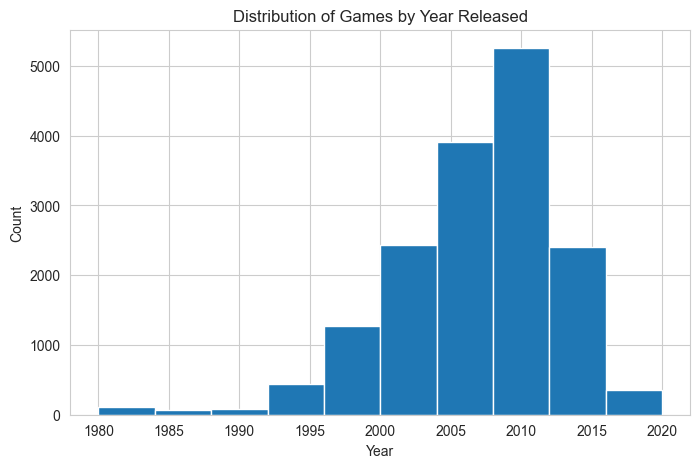

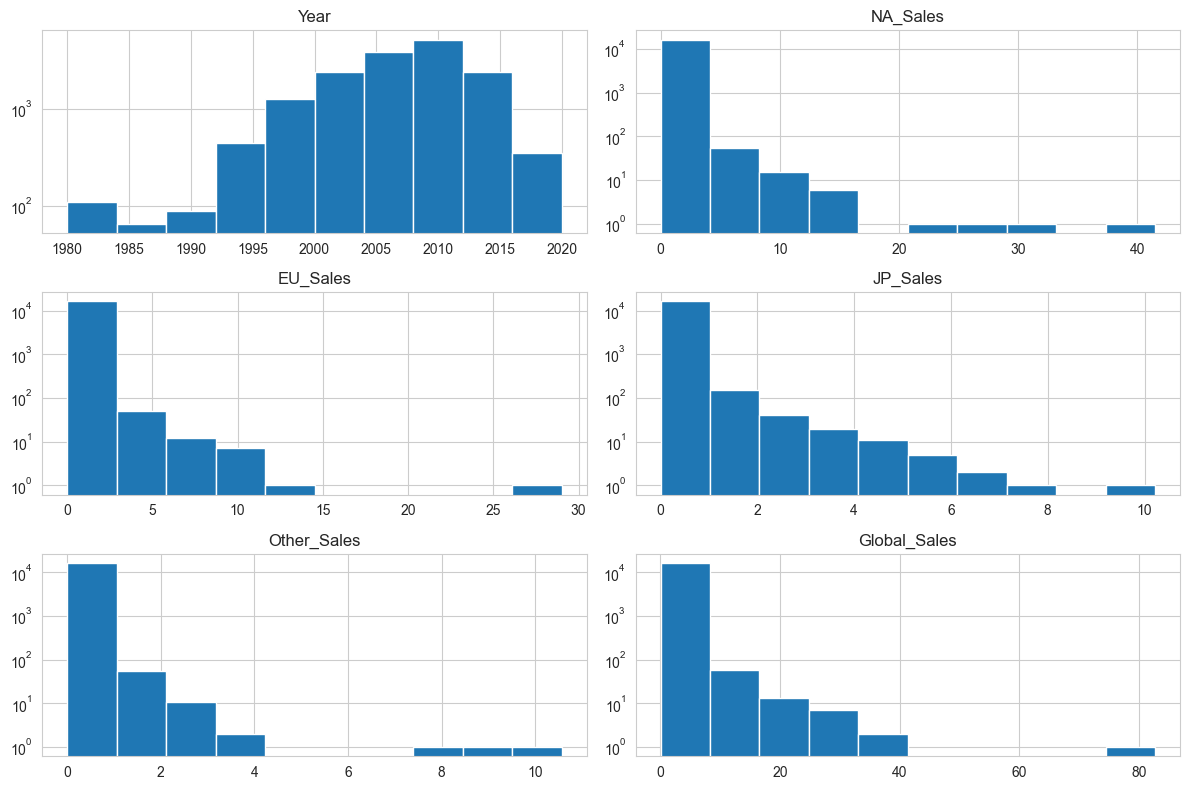

In [418]:
# Inspect histogram by numerical column
df['Year'].hist(figsize=(8,5))
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution of Games by Year Released")
plt.show()

# Plot histograms using a logarithmic scale for the x-axis
df.hist(figsize=(12, 8), bins=10, log=True)  # Log scale for better visualization
plt.tight_layout()
plt.show()

#### *Observations*:

1. Game releases saw a significant surge in the late-2000s and early-2010s, marking a period of rapid growth. However, this momentum began to slow in the mid-2010s, reflecting shifts in the gaming industry landscape.
2. North America leads in total game sales, followed closely by Europe. Japan and the other regions come in third and fourth, respectively, showcasing regional differences in gaming preferences and sales volume.
3. Across all regions, most titles struggle to exceed 5 million dollars in sales. Smaller markets like Japan and other regions typically see caps around 1 million dollars, highlighting a narrower audience or market saturation.

### **5. Data Distribution for Categorical Columns**
***
* The first histogram shows the counts for the Genre column.
* Given the extensive number of game titles in this dataset, focusing on the minimum, median, and maximum values provided a more effective way to visualize the distribution of data across all the categorical columns. This approach allowed for a clear and concise representation of the extremes within each category, avoiding the clutter that could arise from including all entries.

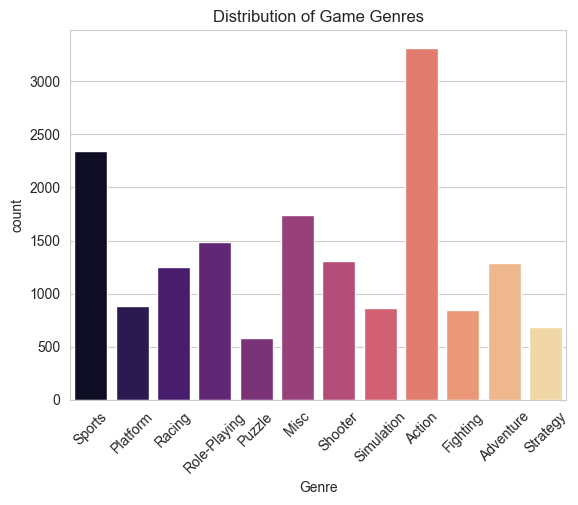

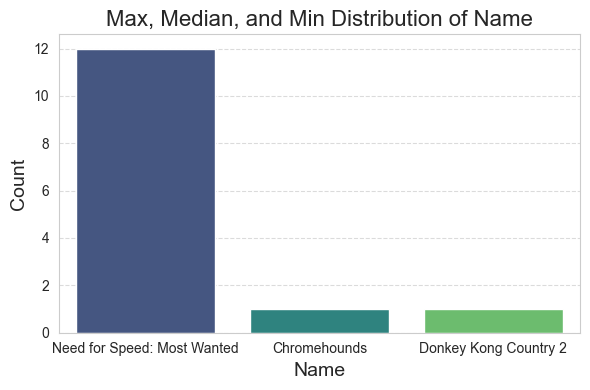

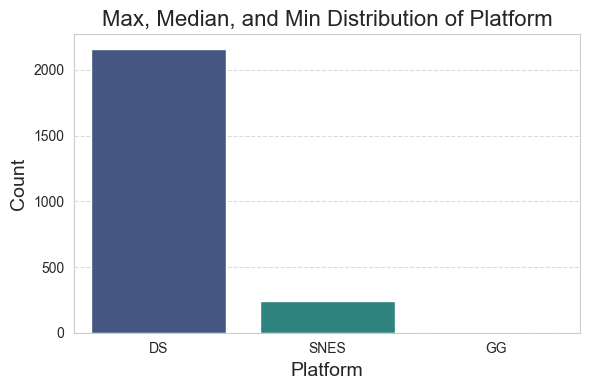

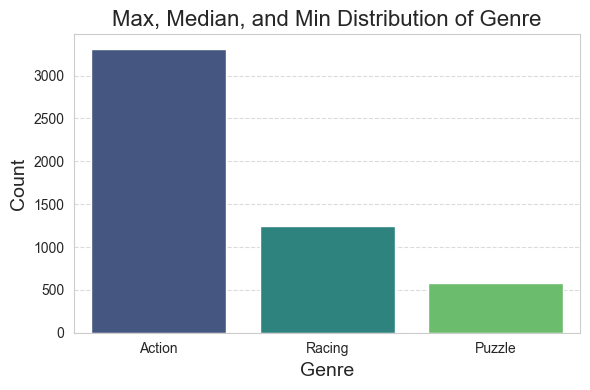

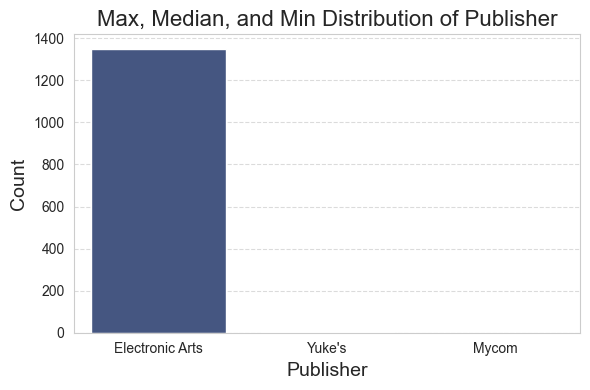

In [419]:
# Inspect value counts for the Genre categorical column
df['Genre'].value_counts()

# Display a count plot for the Genre column
sns.countplot(x='Genre', data=df, hue='Genre', palette="magma", legend=False)

# Set title and show the plot
plt.title('Distribution of Game Genres')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Loop through all categorical columns in the dataset
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Get the value counts for the categorical column
    value_counts = df[col].value_counts()

    # Get the min, max, and median categories
    min_category, min_count = value_counts.idxmin(), value_counts.min()
    max_category, max_count = value_counts.idxmax(), value_counts.max()
    median_category, median_count = value_counts.index[len(value_counts) // 2], value_counts.iloc[len(value_counts) // 2]
    max_median_min_df = pd.DataFrame({'Category': [max_category, median_category, min_category],'Count': [max_count, median_count, min_count]})

    # Plot the max, median, and min counts in a single plot
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Category', y='Count', data=max_median_min_df, hue='Category', palette="viridis", legend=False)
    
    # Rotate x-axis labels and add grid for better readability
    plt.title(f'Max, Median, and Min Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot for each categorical column
    plt.tight_layout()
    plt.show()

#### *Observations*:
1. Action and sports games dominate in sales, while strategy and puzzle games see the least amount of sales.
2. In all categorical columns, the most frequent category significantly outnumbers both the median and least common categories, highlighting a strong skew in distribution.
3. *Need for Speed: Most Wanted* is the most widely available title across consoles, while *Chromehounds* and *Donkey Kong Country 2* are nearly tied as the least available. 
4. The Nintendo DS boasts the highest number of available titles, whereas older consoles like the Super Nintendo Entertainment System (SNES) and Game Gear (GG) trail behind, reflecting the enduring popularity of the DS compared to the retro appeal of its predecessors.
5. While Racing and Puzzle games have a relatively balanced presence in the dataset, Action games dominate the genre landscape, far surpassing all others.
6. Electronic Arts stands out as the most prolific publisher, with a significantly larger number of titles available compared to both the median and least common publishers. 
 

### **6. Data Transformation and Feature Engineering**
***
* Rename the 'Platform' column to 'Console'.
* Rename the 'Name' column to 'Title'.
* Rename the 'Year' column to 'Released'
* Rename the 'Publisher' column to 'Developer'
* Add an average sales column.
* Inspect the changes.

In [420]:
# Renaming columns
df.rename(columns={'Platform': 'Console'}, inplace=True)
df.rename(columns={'Name': 'Title'}, inplace=True)
df.rename(columns={'Year': 'Released'}, inplace=True)
df.rename(columns={'Publisher': 'Developer'}, inplace=True)

# Adding a new column
df['Avg_Sales'] = df['Global_Sales'] / 4

# Display changes
display(df.head(10))

,Title,Console,Released,Genre,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Avg_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,20.6850
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,10.0600
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8.9550
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,8.2500
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7.8425
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,7.5650
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7.5025
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,7.2550
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,7.1550
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,7.0775


### **7. Additional Visualizations**
***

Create a variety of chart types using seaborn and matplotlib to analyze different aspects of the dataset:

#### **Horizontal Bar Chart**
* This horizontal bar chart highlights the top five consoles with the highest global game sales.

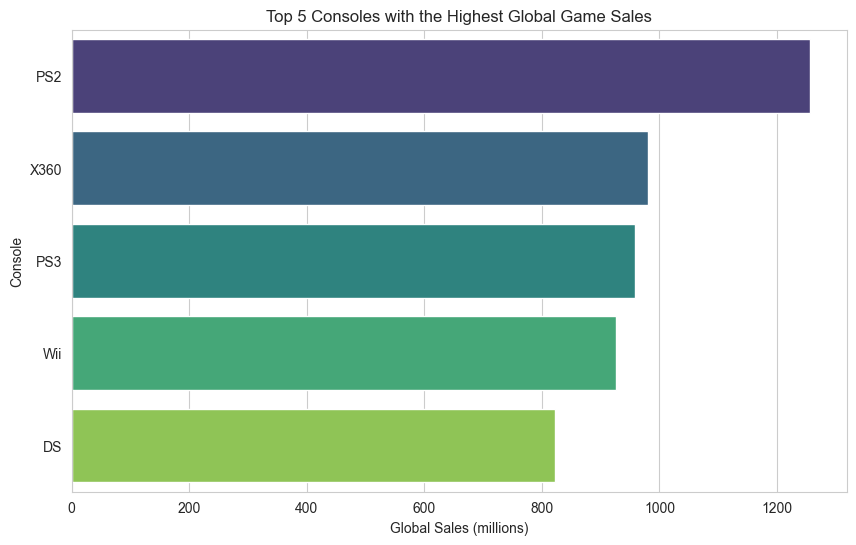

In [421]:
# Get the top 5 consoles by global sales
top_console_sales = df.groupby('Console')['Global_Sales'].sum().nlargest(5)

# Horizontal bar plot for top 5 consoles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_console_sales.values, y=top_console_sales.index, hue=top_console_sales.index, palette="viridis", legend=False)
plt.title("Top 5 Consoles with the Highest Global Game Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Console")
plt.show()

#### *Observations:*
1. PlayStation 2 has the highest global game sales since its release.
2. PlayStation and Nintendo consoles lead the top five, while only one Xbox console makes the list, despite the brand's strong overall game sales.

#### **Line Chart**
* This line chart analyzes how each region contributed to the top 10 best-selling console game titles of all time.

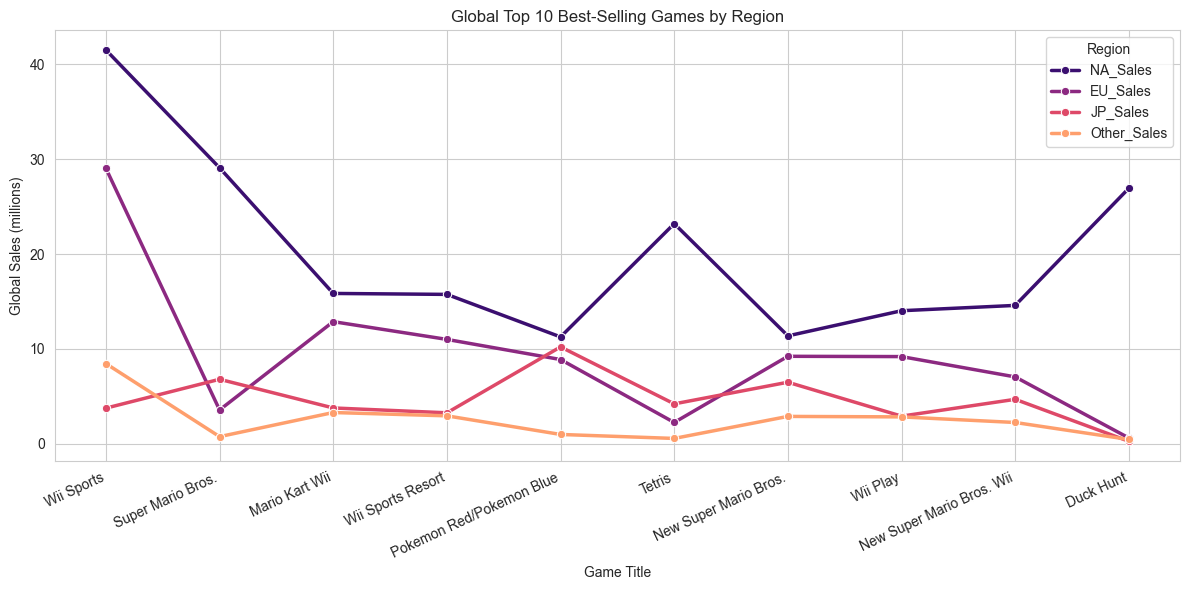

In [422]:
# Sort the dataset by Global_Sales and select the top 10 games
top_games = df.nlargest(10, 'Global_Sales')[['Title', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Melt the dataframe to long format for easier plotting
sales_regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
top_games_melted = top_games.melt(id_vars=['Title'], value_vars=sales_regions, 
                var_name='Region', value_name='Sales')

# Format chart
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(data=top_games_melted, x="Title", y="Sales", hue="Region", marker="o", linewidth=2.5, palette="magma")

# Set labels
plt.xticks(rotation=25, ha="right")  # Rotate x-axis labels
plt.xlabel("Game Title")
plt.ylabel("Global Sales (millions)")
plt.title("Global Top 10 Best-Selling Games by Region")

# Show legend and display the plot
plt.legend(title="Region")
plt.tight_layout()
plt.show()

#### *Observations:*
1. North America leads in console game sales across all regions, playing a significant role in the global success of the top 10 best-selling games.
2. Every title in the top 10 was released for a Nintendo game system.

#### **Pie Chart**
* The goal of this pie chart was to show the distribution of the top 5 best selling games in each region.

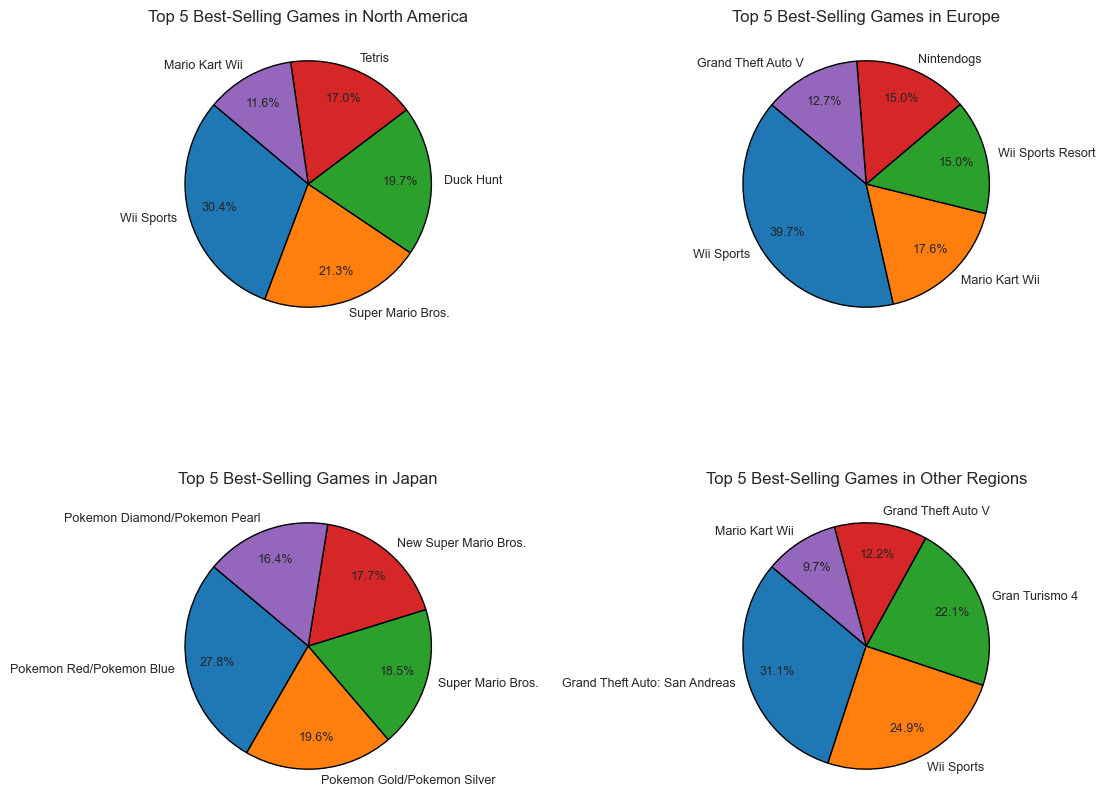

In [423]:
# Define sales regions
sales_regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_titles = ['North America', 'Europe', 'Japan', 'Other Regions']

# Create subplots for each region
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop through each region and create a pie chart for the top 5 games
for ax, region, title in zip(axes, sales_regions, region_titles):
    top_games = df[['Title', region]].nlargest(5, region) # Get the top 5 selling games in the region
    
    # Plot pie chart and adjust labels
    wedges, texts, autotexts = ax.pie(top_games[region], 
        labels=top_games['Title'], 
        autopct='%1.1f%%', 
        startangle=140, 
        wedgeprops={'edgecolor': 'black'},
        labeldistance=1.1,  # Adjust distance to prevent overlap
        pctdistance=.75,  # Adjust labels
        textprops={'fontsize': 9})  # Reduce font size
    
    # Improve label placement
    for text in texts:
        text.set_fontsize(9)
    ax.set_title(f"Top 5 Best-Selling Games in {title}", fontsize=12) # Set title

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the plot
plt.show()

#### *Observations:*
1. Every title in the North America and Japan regions is a Nintendo title.
2. Wii Sports ranks in the top five across three out of four regions, the exception being Japan. 


#### **Line Chart**
* Just for fun, I wanted to compare the number of games released by the top five game developers through 2020. This line chart illustrates that data. 

<Figure size 1200x600 with 0 Axes>

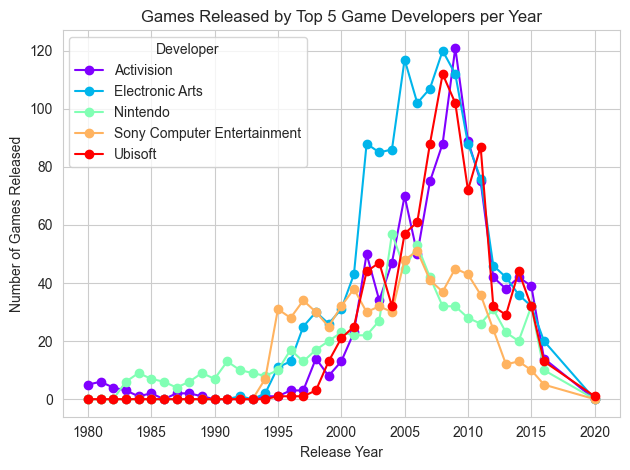

In [424]:
# Get top 5 developers based on global sales
top_publishers_data = df.groupby('Developer')['Global_Sales'].sum().nlargest(5).index
top_developers_df = df[df['Developer'].isin(top_publishers_data)] # Filter the dataframe to include only the top 5 developers
developers_by_year = top_developers_df.groupby(['Released', 'Developer']).size().unstack().fillna(0) # Group by Year and Publisher, then count the number of games

# Plot as a line chart
plt.figure(figsize=(12, 6))
developers_by_year.plot(kind='line', marker='o', linestyle='-', colormap="rainbow")
plt.xlabel("Release Year") # Set label
plt.ylabel("Number of Games Released") # Set label
plt.title("Games Released by Top 5 Game Developers per Year") # Set title

# Display the plot
plt.tight_layout()
plt.show()

#### *Observations:*
1. Electronic Arts and Activision are the top two game developers in the industry.
2. Despite dominating the top 10 best-selling games, Nintendo ranks third for the number of games released.
3. There was a notable surge in game releases from the early to mid-2000s, followed by a sharp decline starting in the late-2000s.
4. Ubisoft ranks 5th on the list, despite appearing to compete with the top two publishers during the peak of console game releases.
5. PlayStation consoles may be the most popular for game sales, but its parent company ranks 4th in terms of the number of games released.


### *Conclusion*

And that’s a wrap on this deep dive into console game sales!

If the data tells us anything, it’s that PlayStation and Nintendo have been running the show, with the PlayStation 2 flexing its dominance in overall global sales. Xbox puts up a good fight, but only one of its consoles cracks the top five in game sales. 

Nintendo may own the best-seller charts, but it takes third place in total games released—quality over quantity, perhaps? Meanwhile, Ubisoft’s rise shows that the tides can turn at any point, even if they don’t flood the market with releases. Lastly, while PlayStation claims the top spot in overall game sales, Sony's presence in game development only reaches fourth place in total releases.

As far as overall game release trends go, there was a steady rise until the early-2000s saw a massive spike, only for the numbers to drop sharply by the early 2010s. Whether it was changing industry trends, shifts in player preferences, or an industry slowdown, it is clear gaming is always evolving.

So, what’s next? Will another console eventually dethrone the PlayStation 2 in sales? Will Xbox gain more ground in the rankings as time goes on? One thing’s for sure: gaming never stays still, and we’re all here for the ride. 🎮